<div style='font-family: "Times New Roman"'>
    <h1 align="center">Zewail City of Science and Technology</h1>
    <h2 align="center">CSAI 253 - Machine Learning</h2>
    <h3 align="center">Assignment 2: Linear Regression & Classification </h3>
</div>

---

<h3 style="text-align:center"> Assignemnt main keypoints (Part - 1): </h3>
<ul>
    <li>Define any linear equation of one variable (e.g. y = 3x+2) </li>
    <li>Select 5 different values for x (X1, x2,... x5) and calculate corresponding y values </li>
    <li>Use x and y values as training data , apply MSSE technique to obtain the equation of the line that best fit on the training data (compare to your defined equation) </li>
    <li>Repeat 1,2, and 3 after adding random noise term to the equation (e.g. y = 3x+2 + random(0..1)) </li>
<ul>

---

### Importing the needed libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

### Generate some linear-looking data <span style="color:#b30000"> Without noise </span>

In [2]:
np.random.seed(42)
X = np.random.rand(5, 1)
y = 2 + 3 * X 

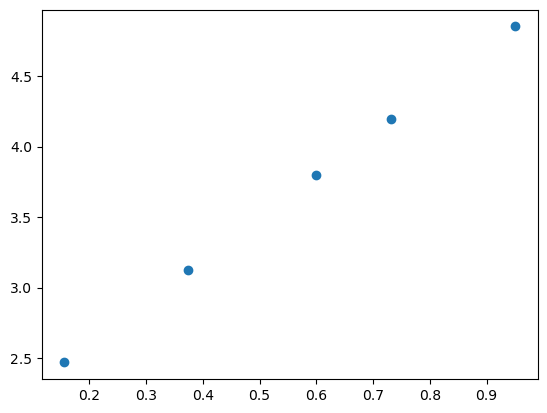

In [3]:
plt.scatter(X,y)

### Compute Θ using the normal equation

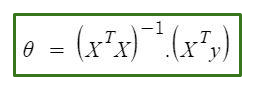

In [4]:
X_b = np.c_[np.ones(5), X]
theta_best = np.linalg.inv(X_b.T @ X_b) @ X_b.T @ y

### Make Prediction

In [5]:
X_test = np.array([[0], [2], [5], [7], [4]])
X_test_b = np.c_[np.ones(5), X_test]
y_pred = X_test_b @ theta_best

In [6]:
print(y_pred)

[[ 2.]
 [ 8.]
 [17.]
 [23.]
 [14.]]


### Plot the result

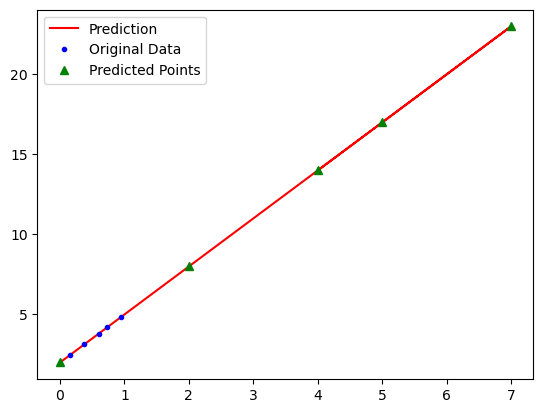

In [7]:
plt.plot(X_test, y_pred, "r-", label="Prediction")
plt.plot(X, y, "b.", label="Original Data")
plt.plot(X_test, y_pred, "g^", label="Predicted Points")
plt.legend()
plt.show()

In [8]:
mse = np.mean((y - y_pred) ** 2)
print("Mean Squared Error (MSE):", mse)

Mean Squared Error (MSE): 135.3789402744639


---

### Generate some linear-looking data <span style="color:#b30000"> With noise </span>

In [9]:
X = 2 * np.random.rand(5, 1)
y = 2 + 3 * X + np.random.rand(5, 1)

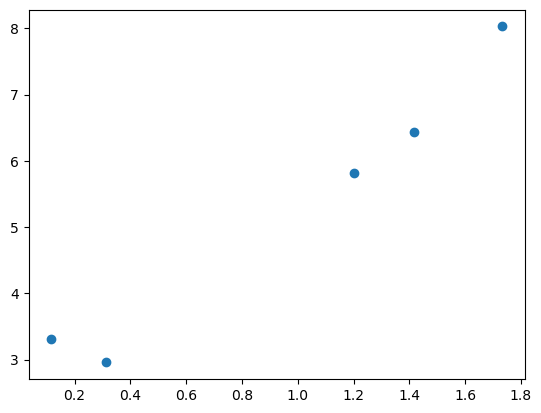

In [10]:
plt.scatter(X,y)

### Compute Θ using the normal equation

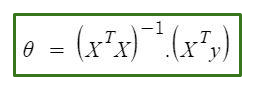

In [11]:
X_b = np.c_[np.ones(5), X]
theta_best = np.linalg.inv(X_b.T @ X_b) @ X_b.T @ y

### Make Prediction

In [12]:
X_test = np.array([[0], [2], [5], [7], [4]])
X_test_b = np.c_[np.ones(5), X_test]
y_pred = X_test_b @ theta_best

In [13]:
print(y_pred)

[[ 2.46502765]
 [ 8.41981325]
 [17.35199166]
 [23.30677726]
 [14.37459886]]


### Plot the result

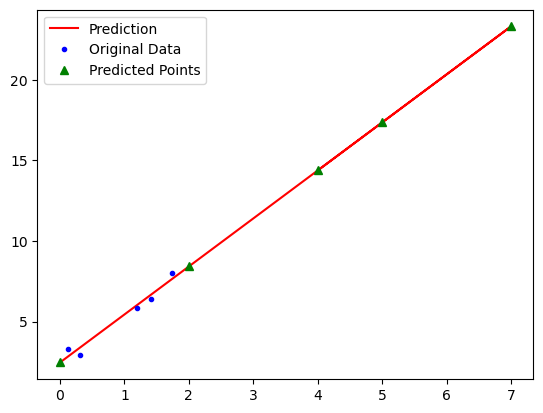

In [14]:
plt.plot(X_test, y_pred, "r-", label="Prediction")
plt.plot(X, y, "b.", label="Original Data")
plt.plot(X_test, y_pred, "g^", label="Predicted Points")
plt.legend()
plt.show()

In [15]:
mse = np.mean((y - y_pred) ** 2)
print("Mean Squared Error (MSE):", mse)

Mean Squared Error (MSE): 96.42172021198692


---

<h3 style="text-align:center"> Assignemnt main keypoints (Part - 2): </h3>
<ul>
    <li>Use IRIS dataset, group samples of class 2 and class 3 together to form new class (Class II)</li>
    <li>Split Class I samples into 40 samples for train and 10 samples for test</li>
    <li>Split Class II samples into 80 samples for train and 20 samples for test</li>
    <li>Train your linear classifier model using Least Squares Technique (MSSE). Let your model output be Positive for Class I and Negative for Others. This model is suitable to classify the input sample as Class I or "Other classes"</li>
    <li>Use your trained model to classify test samples (into either Class I or Class II)</li>
<ul>

---

### Import needed libraries

In [16]:
from sklearn import datasets
from sklearn.model_selection import train_test_split

### Loading the Iris dataset

In [17]:
iris = datasets.load_iris()
iris_df = pd.DataFrame(data = np.c_[iris.data, iris.target], columns = np.append(iris.feature_names, "target"))
iris_df.insert(0, 'b', 1)

### Exploring the Iris dataset

In [18]:
iris_df.head()

,b,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,1,5.1,3.5,1.4,0.2,0.0
1,1,4.9,3.0,1.4,0.2,0.0
2,1,4.7,3.2,1.3,0.2,0.0
3,1,4.6,3.1,1.5,0.2,0.0
4,1,5.0,3.6,1.4,0.2,0.0


In [19]:
iris_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   b                  150 non-null    int64  
 1   sepal length (cm)  150 non-null    float64
 2   sepal width (cm)   150 non-null    float64
 3   petal length (cm)  150 non-null    float64
 4   petal width (cm)   150 non-null    float64
 5   target             150 non-null    float64
dtypes: float64(5), int64(1)
memory usage: 7.2 KB


In [20]:
iris_df.describe()

,b,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
count,150.0,150.000000,150.000000,150.000000,150.000000,150.000000
mean,1.0,5.843333,3.057333,3.758000,1.199333,1.000000
std,0.0,0.828066,0.435866,1.765298,0.762238,0.819232
min,1.0,4.300000,2.000000,1.000000,0.100000,0.000000
25%,1.0,5.100000,2.800000,1.600000,0.300000,0.000000
50%,1.0,5.800000,3.000000,4.350000,1.300000,1.000000
75%,1.0,6.400000,3.300000,5.100000,1.800000,2.000000
max,1.0,7.900000,4.400000,6.900000,2.500000,2.000000


In [21]:
iris_df.isnull().sum()

b                    0
sepal length (cm)    0
sepal width (cm)     0
petal length (cm)    0
petal width (cm)     0
target               0
dtype: int64

In [22]:
print(f"Duplicate Values --> {iris_df.duplicated().sum()} value(s)")

Duplicate Values --> 1 value(s)


In [23]:
iris_df = iris_df.drop_duplicates()
print(f"duplicate values --> {iris_df.duplicated().sum()} value(s)")

duplicate values --> 0 value(s)


---

### Spliting data into Features(X) and Target Values(Y)

In [24]:
class1 = iris_df.iloc[:50]
class2 = iris_df.iloc[50:]

X = class1.iloc[:,:-1] 
y = class2.iloc[:,:-1] * -1

---

### Dividing the data into 80% Training, 20% test

In [25]:
X_train , X_test = train_test_split(X ,test_size=0.2,shuffle=True ,random_state=42)
y_train , y_test = train_test_split(y ,test_size=0.2,shuffle=True ,random_state=42)

---

In [26]:
train_data = np.concatenate((X_train.to_numpy(), y_train.to_numpy()), axis = 0)

In [27]:
X_b = np.c_[np.ones(len(train_data)), train_data]
theta_best = np.linalg.inv(train_data.T @ train_data) @ train_data.T @ np.ones((train_data.shape[0], 1))

In [28]:
print(theta_best)

[[-0.90441186]
 [ 0.17191424]
 [ 0.4637927 ]
 [-0.43860426]
 [-0.16836494]]


In [29]:
y_pred = X_test @ theta_best

In [30]:
y_pred

,0
13,0.726896
39,0.857667
30,0.623094
45,0.647599
17,0.931070
48,1.031187
26,0.762942
25,0.611098
32,1.216349
19,1.026347
